не работает 

In [25]:
#Импорт библиотек
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from keras import Sequential

In [26]:
#Загрузка датасета
df = pd.read_csv('NVDA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-11-09,2.718750,2.854167,2.463542,2.591146,2.377185,56452800
1,2000-11-10,2.679688,2.812500,2.385417,2.450521,2.248172,80524800
2,2000-11-13,2.328125,2.729167,2.250000,2.460938,2.257728,53004000
3,2000-11-14,2.625000,2.932292,2.604167,2.911458,2.671047,47073600
4,2000-11-15,2.859375,2.950521,2.742188,2.873047,2.635808,42386400
...,...,...,...,...,...,...,...
5780,2023-11-02,433.279999,438.839996,428.940002,435.059998,435.059998,40917200
5781,2023-11-03,440.200012,453.089996,437.230011,450.049988,450.049988,42385500
5782,2023-11-06,452.850006,459.350006,448.989990,457.510010,457.510010,40073300
5783,2023-11-07,457.190002,462.179993,451.579987,459.549988,459.549988,34316500


In [27]:
#Проверка значений
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [28]:
# Разделяем данные на тренировочный и тестовый наборы
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]



In [29]:
#проверка типов колонок для дальнейщей работы 
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [30]:
#Сортировка по дате
test.plot(x='Date', y = ['Open', 'High', 'Low', 'Close', 'Adj Close'])

NameError: name 'test' is not defined

In [ ]:
train[['Open', 'High', 'Low', 'Close']].corr()

In [ ]:
import keras
from keras import Sequential
from keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout
from keras.callbacks import ReduceLROnPlateau

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение DataFrame на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(df.drop('Open', axis=1), df['Close'], test_size=0.2, random_state=42)



In [ ]:
x_test = train.sort_index()
y_test = train.sort_index()
x_test.plot(x='Date', y = ['Open', 'High', 'Low', 'Close', 'Adj Close'])

In [ ]:
print(len(x_test), len(y_test), len(x_train), len(y_train))
x_test

In [ ]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categirial_crossentropy', metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
            factor=0.9, 
            patience=5, 
            min_lr=0.000001, 
            verbose=1)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

train_data.drop("Volume", axis=1).plot()
test_data.drop("Volume", axis=1).plot()


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Загружаем данные с помощью pandas
data = pd.read_csv('NVDA.csv')

# Преобразуем данные в numpy массив
dataset = data['High'].values
dataset = dataset.reshape(-1, 1)


# Нормализуем данные
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
print(dataset)
# Разделяем данные на тренировочный и тестовый наборы
train_size = int(len(dataset) * 0.8)
train_data = dataset[:train_size]
test_data = dataset[train_size:]

# Создаем функцию для создания временных последовательностей
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Создаем временные последовательности с заданной длиной
seq_length = 3
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)



[[0.00437746]
 [0.00429446]
 [0.00412846]
 ...
 [0.91372568]
 [0.91936306]
 [0.9322913 ]]


Epoch 1/50
145/145 [==============================] - 1s 1ms/step - loss: 4.2975e-04
Epoch 2/50
145/145 [==============================] - 0s 944us/step - loss: 2.1746e-06
Epoch 3/50
145/145 [==============================] - 0s 937us/step - loss: 1.4877e-06
Epoch 4/50
145/145 [==============================] - 0s 937us/step - loss: 1.5251e-06
Epoch 5/50
145/145 [==============================] - 0s 948us/step - loss: 1.6583e-06
Epoch 6/50
145/145 [==============================] - 0s 936us/step - loss: 1.5664e-06
Epoch 7/50
145/145 [==============================] - 0s 1ms/step - loss: 1.7012e-06
Epoch 8/50
145/145 [==============================] - 0s 922us/step - loss: 1.7250e-06
Epoch 9/50
145/145 [==============================] - 0s 934us/step - loss: 1.7454e-06
Epoch 10/50
145/145 [==============================] - 0s 924us/step - loss: 1.6944e-06
Epoch 11/50
145/145 [==============================] - 0s 944us/step - loss: 1.6015e-06
Epoch 12/50
145/145 [========================

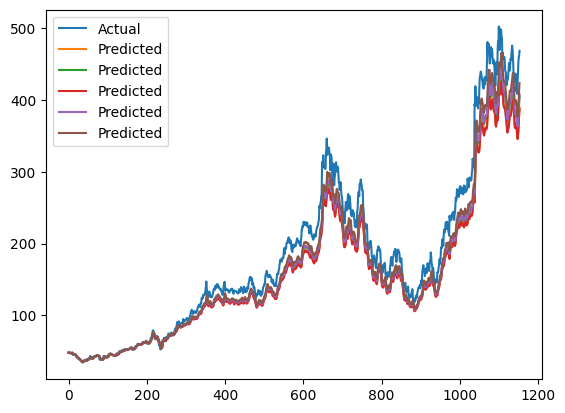

10/10 [==============================] - 0s 1000us/step - loss: 0.0036
test loss, test acc: 0.00359578849747777


In [11]:
# Создаем и обучаем модель нейронной сети
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(5, activation='relu'))
model.compile(optimizer='adam', loss='mse')
#print(X_train)
#print(y_train)
history = model.fit(X_train, y_train, epochs=50, batch_size=32)
# Прогнозируем будущие значения
predicted_values = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted_values)

# Визуализируем прогнозируемые и фактические значения
import matplotlib.pyplot as plt

plt.plot(scaler.inverse_transform(test_data[seq_length:]), label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()

results = model.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)